# O Algoritmo KNN

O KNN (K-nearest neighbors, ou “K-vizinhos mais próximos”) costuma ser um dos primeiros algoritmos aprendidos por iniciantes no mundo do aprendizado de máquina.

O KNN é muito utilizado em problemas de classificação, e felizmente é um dos algoritmos de machine learning mais fáceis de se compreender.

Em resumo, o KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. Se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria.

# Classe KNN

#### Construtor: K, x de treino e Y de Treino

#### Método Estático para encontrar a distância euclidiana entre dois pontos

#### Função predict: Todas as previsões a partir do x de treino

#### Função _predict: A partir de todas as previsões classifica o dado pelo mais comum.

In [ ]:
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, k, x_train, y_train):
        self.k = k
        self.x_train = x_train
        self.y_train = y_train

    @staticmethod
    def euclidean_distance(x1, x2):
        distance = np.sqrt(np.sum((x1 - x2) ** 2))
        return distance

    def predict(self, data):
        predictions = [self._predict(x) for x in data]
        return predictions

    def _predict(self, x):
        # Calcula as distâncias entre os valores
        distances = [self.euclidean_distance(x, x_train) for x_train in self.x_train]

        # Recupera os indices e seus rotulos
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Determina a classe mais comum
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

    #Mede a acurácia do modelo
    def accuracy(self, y_test, x_test):
        return np.sum(self.predict(x_test) == y_test) / len(y_test)

Uso da Classe KNN e importação do dataset. Aqui fazemos o primeiro experimento com k = 1.

A Base de Treinamento tem tamanho de 80% dos dados, consequentemente a base de teste tem 20%.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dados = datasets.load_breast_cancer()
X, y = dados.data, dados.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

modelo = KNN(1, X_train,y_train)
previsoes = modelo.predict(X_test)
acuracia = modelo.accuracy(y_test, X_test)
print('Acurácia: ', acuracia)

Acurácia:  0.9122807017543859


#### - Experimento da relação entre o valor de K e sua Acurácia

In [ ]:
valores_K = []
acuracias = []

for k in range(1,10):
  modelo = KNN(k, X_train,y_train)
  previsoes = modelo.predict(X_test)
  acuracia = modelo.accuracy(y_test, X_test)
  valores_K.append(k)
  acuracias.append(acuracia)
  print(f'Valor de K: {k}, Acurácia: {acuracia}')

Valor de K: 1, Acurácia: 0.9122807017543859
Valor de K: 2, Acurácia: 0.9122807017543859
Valor de K: 3, Acurácia: 0.9473684210526315
Valor de K: 4, Acurácia: 0.9385964912280702
Valor de K: 5, Acurácia: 0.9298245614035088
Valor de K: 6, Acurácia: 0.9298245614035088
Valor de K: 7, Acurácia: 0.9298245614035088
Valor de K: 8, Acurácia: 0.9298245614035088
Valor de K: 9, Acurácia: 0.9298245614035088


Visualizando os dados graficamente

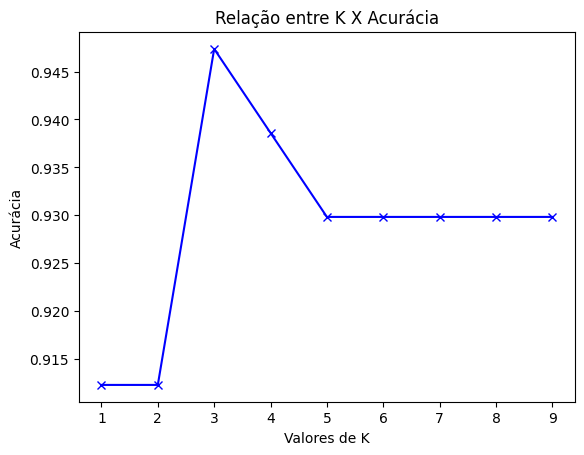

In [ ]:
plt.plot(valores_K, acuracias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Acurácia')
plt.title('Relação entre K X Acurácia')
plt.show()

# Conclusão

Quando o k é pequeno, a classificação fica mais sensível a regiões bem próximas (podendo ocorrer o problema de overfitting). Com k grande, a classificação fica menos sujeita a ruídos pode ser considerada mais robusta, porém se k for grande demais, pode ser que haja o problema de underfitting.
No exemplo nota-se que a acurácia se mantém constante a partir do momento em que o K >= 5. Tendo sua maior taxa de acurácia quando o K = 3.

# Referências

DataSet - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

KNN - https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/